In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings

In [2]:
# Read the cleaned data
df=pd.read_csv('vehicles3.csv')

df

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average,Mile_ratings,Manufacturer_category
0,0,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,4wd,non-luxury_small,light color,10.0,5792.300000,below_average,American
1,1,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,4wd,non-luxury_small,dark color,14.0,5087.785714,below_average,American
2,4,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,other,4wd,non-luxury_small,dark color,12.0,5724.666667,below_average,American
3,13,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,6.0,other,55251.0,clean,other,4wd,non-luxury_small,dark color,10.0,5525.100000,below_average,Japanese
4,28,24590,2013.0,gmc,sierra 1500 extended cab slt,good,8.0,other,80318.0,clean,other,4wd,non-luxury_small,light color,11.0,7301.636364,below_average,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146511,263661,7477,2012.0,fiat,500,good,6.0,gas,64267.0,clean,manual,4wd,Luxury_small,light color,12.0,5355.583333,below_average,Italian
146512,263662,5477,2003.0,nissan,murano,good,6.0,gas,168055.0,clean,automatic,4wd,luxury_large,dark color,21.0,8002.619048,below_average,Japanese
146513,263670,29590,2016.0,toyota,4runner sr5 sport utility,good,6.0,gas,53475.0,clean,automatic,4wd,luxury_large,dark color,8.0,6684.375000,below_average,Japanese
146514,263672,32990,2016.0,infiniti,qx80 sport utility 4d,good,8.0,gas,55612.0,clean,automatic,rwd,Luxury_small,dark color,8.0,6951.500000,below_average,Japanese


In [3]:
df=df.drop('Unnamed: 0', axis=1)

In [4]:
df.describe()

,price,year,cylinders,odometer,age,Mile_average
count,146516.000000,146516.000000,146207.000000,146516.000000,146516.000000,146516.000000
mean,17851.038781,2011.567208,5.970802,111210.973197,12.432792,9560.359951
std,12246.151696,5.517643,1.247726,47572.633575,5.517643,3827.948645
min,1000.000000,1905.000000,3.000000,45000.000000,2.000000,505.425532
25%,8950.000000,2009.000000,6.000000,74337.000000,9.000000,7039.364583
50%,14900.000000,2013.000000,6.000000,102730.000000,11.000000,9034.166667
75%,23995.000000,2015.000000,6.000000,138953.000000,15.000000,11426.976136
max,195000.000000,2022.000000,12.000000,500000.000000,119.000000,103917.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146516 entries, 0 to 146515
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  146516 non-null  int64  
 1   year                   146516 non-null  float64
 2   manufacturer           146516 non-null  object 
 3   model                  146516 non-null  object 
 4   condition              146516 non-null  object 
 5   cylinders              146207 non-null  float64
 6   fuel                   146516 non-null  object 
 7   odometer               146516 non-null  float64
 8   title_status           146516 non-null  object 
 9   transmission           146516 non-null  object 
 10  drive                  146516 non-null  object 
 11  type                   146516 non-null  object 
 12  paint_color            146516 non-null  object 
 13  age                    146516 non-null  float64
 14  Mile_average           146516 non-nu

In [6]:
df.isna().sum()

price                      0
year                       0
manufacturer               0
model                      0
condition                  0
cylinders                309
fuel                       0
odometer                   0
title_status               0
transmission               0
drive                      0
type                       0
paint_color                0
age                        0
Mile_average               0
Mile_ratings               0
Manufacturer_category      0
dtype: int64

In [7]:
df.dropna(subset=['cylinders'], inplace=True)

In [8]:
df.isna().sum()

price                    0
year                     0
manufacturer             0
model                    0
condition                0
cylinders                0
fuel                     0
odometer                 0
title_status             0
transmission             0
drive                    0
type                     0
paint_color              0
age                      0
Mile_average             0
Mile_ratings             0
Manufacturer_category    0
dtype: int64

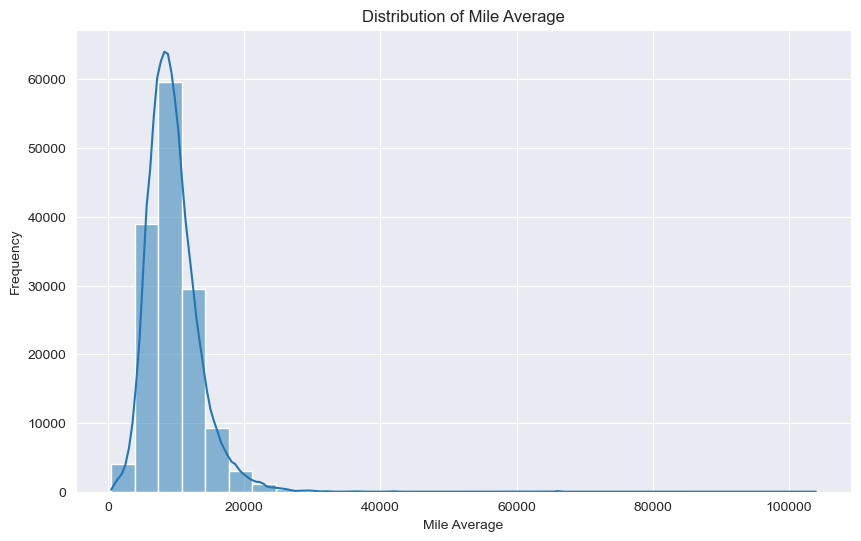

In [9]:
# EDA
# Distribution of Mile_average
plt.figure(figsize=(10, 6))
sns.histplot(df['Mile_average'], kde=True, bins=30)
plt.title('Distribution of Mile Average')
plt.xlabel('Mile Average')
plt.ylabel('Frequency')
plt.show()

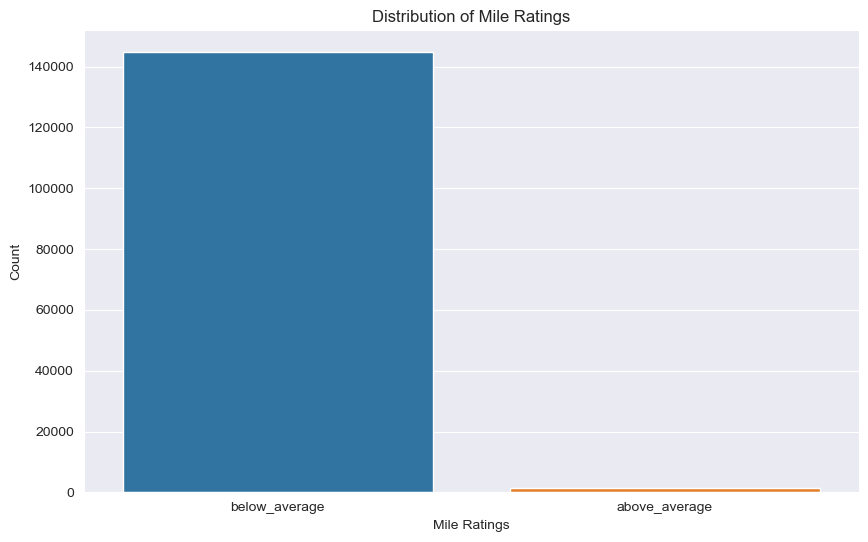

In [10]:
# Count plot for Mile_ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Mile_ratings', data=df)
plt.title('Distribution of Mile Ratings')
plt.xlabel('Mile Ratings')
plt.ylabel('Count')
plt.show()

In [11]:
# Preprocessing

# Initialize the label encoder
label_encoder = LabelEncoder()

# Select columns to encode
text_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each column
for col in text_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age,Mile_average,Mile_ratings,Manufacturer_category
0,33590,2014.0,13,9889,2,8.0,2,57923.0,0,2,0,3,1,10.0,5792.300000,1,0
1,22590,2010.0,6,10094,2,8.0,2,71229.0,0,2,0,3,0,14.0,5087.785714,1,0
2,27990,2012.0,13,9960,2,8.0,2,68696.0,0,2,0,3,0,12.0,5724.666667,1,0
3,33590,2014.0,37,11564,2,6.0,4,55251.0,0,2,0,3,0,10.0,5525.100000,1,4
4,24590,2013.0,13,9900,2,8.0,4,80318.0,0,2,0,3,1,11.0,7301.636364,1,0


In [12]:
# Prepare features and target variable
x = df.drop(['price'], axis=1)
y = df['price']


In [13]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12345)

In [14]:
# Creating the model

model=LinearRegression()

# Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_prediction= model.predict(x_test)


In [16]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_prediction)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_prediction)

# Calculate r2 score
r2 = r2_score(y_test,y_prediction)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'r2_score: {r2}')

MSE: 69401386.12823519
RMSE: 8330.74943376856
MAPE: 0.49237351087802195
r2_score: 0.5329087873973222


In [17]:
# Creating the 2nd model

model=XGBRegressor()

# Fit the model
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
y_prediction= model.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_prediction)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_prediction)

# Calculate r2 score
r2 = r2_score(y_test,y_prediction)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'r2_score: {r2}')

MSE: 17733418.440533876
RMSE: 4211.106557727301
MAPE: 0.21552302103890542
r2_score: 0.8806490131526385


In [19]:
# Creating the 3nd model

model1=RandomForestRegressor()

# Fit the model
model1.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
y_prediction= model1.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_prediction)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_prediction)

# Calculate r2 score
r2 = r2_score(y_test,y_prediction)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'r2_score: {r2}')

MSE: 11670775.177436996
RMSE: 3416.2516267741457
MAPE: 0.13740303105204427
r2_score: 0.9214523393009801


In [21]:
# Creating the 4nd model
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()

# Fit the model
model.fit(x_train, y_train)

KNeighborsRegressor()

In [22]:
y_prediction= model.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_prediction)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_prediction)

# Calculate r2 score
r2 = r2_score(y_test,y_prediction)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'r2_score: {r2}')

MSE: 50731697.8116914
RMSE: 7122.618746759607
MAPE: 0.3557411447336659
r2_score: 0.6585611387577898


In [23]:
# Data for the table
data = {
    "Sr No": [1, 2, 3, 4],
    "Algorithm Name": ["Linear Regression", "XGBoost Regressor", "Random Forest Regressor","K-Nearest Neighbors"],
    "MSE": [69401836.12823519, 17732418.440533876, 11608783.146707743, 50731697.8116914],
    "RMSE": [8330.74943376856, 4211.106577723701, 3417.71607169287, 7122.618746759607],
    "MAPE": [0.49237351807802195, 0.21552320123890542, 0.13741312156640414,0.3557411447336659 ],
    "R2 Score": [0.5329087873973222, 0.8806490311526385, 0.9213849828804381, 0.6585611387577898]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Sr No,Algorithm Name,MSE,RMSE,MAPE,R2 Score
0,1,Linear Regression,6.940184e+07,8330.749434,0.492374,0.532909
1,2,XGBoost Regressor,1.773242e+07,4211.106578,0.215523,0.880649
2,3,Random Forest Regressor,1.160878e+07,3417.716072,0.137413,0.921385
3,4,K-Nearest Neighbors,5.073170e+07,7122.618747,0.355741,0.658561


In [24]:
import pickle

In [25]:
# save / dump the model to a file 
# w - write, b - b format,t- text format
with open('car_price_prediction.pkl','wb') as file:
    pickle.dump(model1,file)